In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/anime.csv')
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,ONA,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [3]:
df.Type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Unknown'], dtype=object)

In [4]:
df = df[df.Type.isin(['TV', 'Movie', 'OVA', 'Special'])]
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [5]:
df = df.dropna(0)
df = df[~df.Synopsis.str.contains('no synopsis', case=False)]
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [6]:
ban_words = ['anime', 'animation', 'animated', 'movie', 'cinema', 'film', 'screened', 
             'tv series', 'manga', 'novel', 'prequel', 'sequel', 'compilation', 'recap',
             'summary', 'based on', 'season', 'half', 'commercial', 'episode', 'condensed',
             'ova', 'dvd', 'blu-ray', 'bd', 'spin-off', 'station ID', 'chapter',
             'continuation', 'advertisement', 'tv show', 'tv program', 'tv special',
             'aired', 'graduation', 'safety', 'educational', 'retelling', 'remake',
             'released']

In [7]:
for word in ban_words:
    print(word, df.Synopsis.str.contains(word, case=False).sum())

anime 928
animation 517
animated 314
movie 585
cinema 37
film 825
screened 66
tv series 194
manga 670
novel 201
prequel 36
sequel 115
compilation 66
recap 270
summary 77
based on 868
season 534
half 187
commercial 131
episode 1187
condensed 10
ova 472
dvd 669
blu-ray 332
bd 227
spin-off 31
station ID 11
chapter 66
continuation 60
advertisement 18
tv show 12
tv program 9
tv special 53
aired 433
graduation 57
safety 207
educational 228
retelling 40
remake 27
released 303


In [8]:
for word in ban_words:
    df = df[~df.Synopsis.str.contains(word, case=False)]

In [9]:
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17553,48466,Kyoukai Senki,TV,"Action, Mecha","In the year 2061 AD, Japan has lost its sovere..."
17554,48470,D_Cide Traumerei,TV,"Action, Adventure, Drama, Magic, Fantasy",The stage is Shibuya. When Ryuuhei Oda was in ...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...


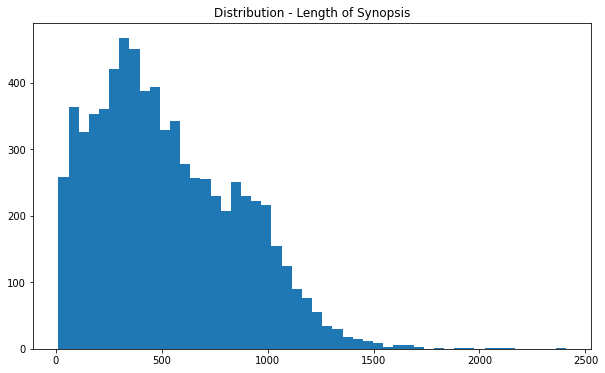

In [10]:
synlen = df.Synopsis.str.len()

plt.figure(figsize=(10, 6))
plt.hist(synlen, bins=50)
plt.title('Distribution - Length of Synopsis')
plt.show()

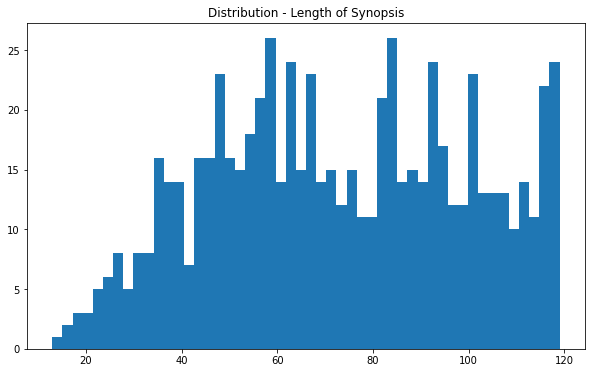

In [11]:
shorts = synlen[synlen < 120]

plt.figure(figsize=(10, 6))
plt.hist(shorts, bins=50)
plt.title('Distribution - Length of Synopsis')
plt.show()

In [12]:
df = df[synlen > 120]

In [13]:
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17553,48466,Kyoukai Senki,TV,"Action, Mecha","In the year 2061 AD, Japan has lost its sovere..."
17554,48470,D_Cide Traumerei,TV,"Action, Adventure, Drama, Magic, Fantasy",The stage is Shibuya. When Ryuuhei Oda was in ...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...


In [14]:
df.to_csv('test.csv', index=False)